In [49]:
# imports the libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import glob
from matplotlib import pyplot as plt

In [50]:
# sets the image size to 32x32 pixels 
# converts to a list of 3072 numbers representing the intersity of pixels in 3 matrices
def image_to_feature_vector(image, size=(32, 32)):    
    return cv2.resize(image, size).flatten()

In [51]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])
    # handle normalizing the histogram if we are using OpenCV 2.4.X
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    # otherwise, perform "in place" normalization in OpenCV 3 (I
    # personally hate the way this is done
    else:
        cv2.normalize(hist, hist)
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [52]:
# image list
images = []

# maps all images and assigns the image list
for image in glob.glob(r"dataset\*jpg"):    
    images.append(image)
# images

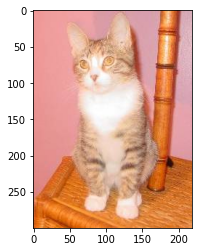

In [53]:
img= cv2.imread(images[12])
b,g,r = cv2.split(img)
img = cv2.merge((r,g,b))
plt.imshow(img)


In [54]:
imagePaths = images #list(paths.list_images(args["dataset"]))
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
rawImages = []
features = []
labels = []

In [55]:
# loop over the input images
for (i, imagePath) in enumerate(imagePaths):
    # load the image and extract the class label (assuming that our
    # path as the format: /path/to/dataset/{class}.{image_num}.jpg
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    
    # extract raw pixel intensity "features", followed by a color    
    pixels = image_to_feature_vector(image)
    
    # histogram to characterize the color distribution of the pixels in the image
    hist = extract_color_histogram(image)
    
    # update the raw images, features, and labels matricies    
    rawImages.append(pixels)
    features.append(hist)
    labels.append(label)
    
    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] processed 1000/25000
[INFO] processed 2000/25000
[INFO] processed 3000/25000
[INFO] processed 4000/25000
[INFO] processed 5000/25000
[INFO] processed 6000/25000
[INFO] processed 7000/25000
[INFO] processed 8000/25000
[INFO] processed 9000/25000
[INFO] processed 10000/25000
[INFO] processed 11000/25000
[INFO] processed 12000/25000
[INFO] processed 13000/25000
[INFO] processed 14000/25000
[INFO] processed 15000/25000
[INFO] processed 16000/25000
[INFO] processed 17000/25000
[INFO] processed 18000/25000
[INFO] processed 19000/25000
[INFO] processed 20000/25000
[INFO] processed 21000/25000
[INFO] processed 22000/25000
[INFO] processed 23000/25000
[INFO] processed 24000/25000


In [56]:
# show some information on the memory consumed by the raw images
# matrix and features matrix
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(
    rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(
    features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 75.00MB
[INFO] features matrix: 50.00MB


In [57]:
# partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
(trainRI, testRI, trainRL, testRL) = train_test_split(rawImages, labels, test_size=0.25, random_state=42)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(features, labels, test_size=0.25, random_state=42)

In [58]:
print("evaluating raw pixel accuracy...")
model_pixels = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, p=2)
model_pixels.fit(trainRI, trainRL, )
acc = model_pixels.score(testRI, testRL)
print("raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating raw pixel accuracy...
[INFO] raw pixel accuracy: 56.99%


In [59]:
# train and evaluate a k-NN classifer on the histogram wih random neighbors equals 
print("evaluating histogram accuracy...")
model_hist = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, p=2)
model_hist.fit(trainFeat, trainLabels)
acc = model_hist.score(testFeat, testLabels)
print("histogram accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating histogram accuracy...
[INFO] histogram accuracy: 59.86%


In [61]:
k = np.random.randint(20,35,10)
params = { 'n_neighbors' : k  }

random_search = RandomizedSearchCV(model_pixels, params, n_iter=10, n_jobs=-1, verbose=0)
random_search.fit(trainRI, trainRL)

RandomizedSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': array([29, 29, 29, 26, 24, 33, 33, 30, 33, 23])})

In [41]:
print(random_search.best_params_)

{'n_neighbors': 27}


In [42]:
k

array([ 3, 29, 42, 45, 19, 32, 46, 15,  5, 43, 11, 37, 24, 26, 27, 12,  5,
       24, 27, 33])